# МЛиТА 2013
# ИДЗ 2, вариант 13
## Выполнил: Макаров Дмитрий, студент ЛЭТИ, гр. 9306

Задание: Алгебраические формулы со скобками и знаками операций + и -. При этом перед скобкой плюс стоять не может: a+b-(c-(d-f))

#### 1. Набор граничных примеров и контрпримеров, демонстрирующих уточнение языка.
<table style="border: 1px solid black">
    <tr>
        <td style="border: 1px solid black; text-align: center"><b>Правильно</b></td>
        <td style="border: 1px solid black; text-align: center"><b>Неправильно</b></td>
    </tr>
    <tr>
        <td style="border: 1px solid black; text-align: center">
            a<br>
            a - b<br>
            a - (b - c)<br>
            (a + b) - c<br>
            (a - b)<br>
            a - (b - (c + d - (e - f)))<br>
            (a - b) - (c + d)
        </td>
        <td style="border: 1px solid black; text-align: center">
            +a<br>
            -a<br>
            -(a + b)<br>
            a+<br>
            a-<br>
            (a-b)-<br>
            a(a-b)<br>
            (a+b)d<br>
            ab
        </td>
    </tr>
</table>

#### 2. КС-грамматика языка.

In [ ]:
<FORMULA> ::= <CHAR><EXPRESSION> | (<FORMULA>)<EXPRESSION>
<EXPRESSION> ::= +<CHAR><EXPRESSION> | -<FORMULA> | /\ #/\ - пустой символ
<CHAR> ::= a|b|c|...|z

#### 3. Грамматический разбор одного примера.

In [ ]:
a + b - (c - (d - f))
<FORMULA>
<CHAR><EXPRESSION>
a<EXPRESSION>
a + <CHAR><EXPRESSION>
a + b<EXPRESSION>
a + b - <FORMULA>
a + b - (<FORMULA)<EXPRESSION>
a + b - (<CHAR><EXPRESSION>)<EXPRESSION>
a + b - (c<EXPRESSION>)<EXPRESSION>
a + b - (c - <FORMULA>)<EXPRESSION
a + b - (c - (<FORMULA>)<EXPRESSION>)<EXPRESSION>
a + b - (c - (<CHAR><EXPRESSION>)<EXPRESSION>)<EXPRESSION>
a + b - (c - (d<EXPRESSION>)<EXPRESSION>)<EXPRESSION>
a + b - (c - (d - <FORMULA>)<EXPRESSION>)<EXPRESSION>
a + b - (c - (d - <CHAR><EXPRESSION>)<EXPRESSION>)<EXPRESSION>
a + b - (c - (d - f<EXPRESSION>)<EXPRESSION>)<EXPRESSION>
a + b - (c - (d - f)<EXPRESSION>)<EXPRESSION>
a + b - (c - (d - f))<EXPRESSION>
a + b - (c - (d - f)) - correct

#### 4. Проверка того, что грамматика удовлетворяет однозначности ветвления по первому символу (принадлежит классу LL0).
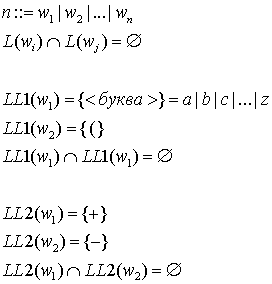

Грамматика удовлетворяет условию однозначности ветвления по первому символу

#### 5. Модифицированная грамматика (если исходная КС-грамматика не удовлетворяет условию однозначности ветвления).
Грамматика удовлетворяет условию.

#### 6. Таблица перевода языка в диаграммы
<table style="border: 1px solid black">
    <tr>
        <td style="border: 1px solid black; text-align: center"><b>Правило</b></td>
        <td style="border: 1px solid black; text-align: center"><b>Диаграмма</b></td>
    </tr>
    <tr>
        <td style="border: 1px solid black; text-align: center">FORMULA</td>
        <td style="border: 1px solid black"><img src="Images/FORMULA.png"></td>
    </tr>
    <tr>
        <td style="border: 1px solid black; text-align:center">EXPRESSION</td>
        <td style="border: 1px solid black"><img src="Images/EXPRESSION.png"></td>
    </tr>
</table>

#### 7. Таблица перевода синтаксических диаграмм в алгоритм синтаксического анализа.
<table style="border: 1px solid black">
    <tr>
        <td style="border: 1px solid black; text-align: center"><b>Диаграмма</b></td>
        <td style="border: 1px solid black; text-align: center"><b>Алгоритм</b></td>
    </tr>
    <tr>
        <td style="border: 1px solid black"><img src="Images/FORMULA.png"></td>
        <td width=220 style="border: 1px solid black; text-align: left">
            <pre>
FORMULA:
{
    if ch == CHAR:
    {
        read(ch);
        EXPRESSION;
    }
    else if ch == '(':
    {
        read(ch);
        FORMULA;
        if ch == ')':
        {
            read(ch)
            EXPRESSION;
        }
        else error;
    }
}
            </pre>
        </td>
     <tr>
     <tr>
        <td style="border: 1px solid black"><img src="Images/EXPRESSION.png"></td>
        <td width=380 style="border: 1px solid black; text-align: left">
            <pre>
EXPRESSION:
{
    if ch == '+':
    {
        read(ch);
        if ch == CHAR:
        {
            read(ch);
            EXPRESSION;
        }
        else error;
    }
    else if ch == '-':
    {
        read(ch);
        FORMULA;
    }
    else if ch == '/\': ##'/\' - пустое слово
    {
        Do nothing ##Пропуск
    }
    else error;
}
            <pre>
        </td>
    </tr>
</table>

#### 8. Таблица перевода алгоритма в программу.
<table style="border: 1px solid black">
    <tr>
        <td style="border: 1px solid black; text-align: center"><b>Алгоритм</b></td>
        <td style="border: 1px solid black; text-align: center"><b>Код (Python)</b></td>
    </tr>
    <tr>
        <td width=380 style="border: 1px solid black; text-align: left">
            <pre>
FORMULA:
{
    if ch == CHAR:
    {
        read(ch);
        EXPRESSION;
    }
    else if ch == '(':
    {
        read(ch);
        FORMULA;
        if ch == ')':
        {
            read(ch)
            EXPRESSION;
        }
        else error;
    }
}
            </pre>
        <td width=280 style="border: 1px solid black; text-align: left">
            <pre>
def FORMULA(ch):
    global bracket_count
    if 'a' <= ch <= 'z':
        ch = read()
        ch = EXPRESSION(ch)
    elif ch == '(':
        bracket_count += 1
        ch = read()
        ch = FORMULA(ch)
        if ch == ')':
            ch = read()
            bracket_count -= 1
            ch = EXPRESSION(ch)
        else: raise ValueError
    else: raise ValueError
    return ch;
            </pre>
        </td>
    </tr>
    <tr>
        <td width=230 style="border: 1px solid black; text-align: left">
            <pre>
EXPRESSION:
{
    if ch == '+':
    {
        read(ch);
        if ch == CHAR:
        {
            read(ch);
            EXPRESSION;
        }
        else error;
    }
    else if ch == '-':
    {
        read(ch);
        FORMULA;
    }
    else if ch == '/\': ##'/\' - пустое слово
    {
        Do nothing ##Пропуск
    }
    else error;
}
            </pre>
        </td>
        <td width=330 style="border: 1px solid black; text-align:left">
            <pre>
def EXPRESSION(ch):
    if ch == '+':
        ch = read()
        if 'a' <= ch <= 'z':
            ch = read()
        else: raise ValueError
        ch = EXPRESSION(ch)
    elif ch == '-':
        ch = read()
        ch = FORMULA(ch)
    elif ch == ')': ch = ')' #Пропуск
    elif ch == '#': ch = '#' #Пропуск
    else: raise ValueError
    return ch
            </pre>
        </td>
    </tr>
</table>

#### 9. Исходный код программы.

In [44]:
bracket_count = 0

def read():
    global s
    ret = s[0]
    s = s[1:]
    
    return ret

def FORMULA(ch):
    global bracket_count
    if 'a' <= ch <= 'z':
        ch = read()
        ch = EXPRESSION(ch)
    
    elif ch == '(':
        bracket_count += 1
        ch = read()
        ch = FORMULA(ch)
        
        if ch == ')':
            ch = read()
            bracket_count -= 1
            ch = EXPRESSION(ch)
        else: raise ValueError
    
    else: raise ValueError
    
    return ch;

def EXPRESSION(ch):
    if ch == '+':
        ch = read()
        if 'a' <= ch <= 'z':
            ch = read()
        else: raise ValueError
        ch = EXPRESSION(ch)
    
    elif ch == '-':
        ch = read()
        ch = FORMULA(ch)
    
    elif ch == ')': ch = ')' #Пропуск
    elif ch == '#': ch = '#' #Пропуск

    else: raise ValueError
    
    return ch

s = input('Enter your expression: ')
s = s + '#'
try:
    ch = read()
    ch = FORMULA(ch)
    if bracket_count != 0: raise ValueError
    print('Entered formula is correct')
except ValueError as ve:
    print('Formula is incorrect')

Enter your expression: a+b-(c-(d-f))
Entered formula is correct
